In [1]:
import ray
import torch
import matplotlib.pyplot as plt
import random
import numpy as np

from env.static_env import TA_Static
from utils import load_train_config, load_ray_config, save_configs

In [9]:

def plot(env):
    vehicle_info = env.vehicle_initial
    task_info = env.task
    vehicle_amount = env.vehicle_total_num
    task_amount = env.task_total_num

    fig, ax = plt.subplots()

    ax.set_title("Mission Environment")
    ax.set_xlim((-0.1,1.2))
    ax.set_ylim((-0.1,1.2))
    ax.set_aspect("equal")


    task_colors = ["r","m","c"]
    for i, (t_type_name, t_info) in enumerate(task_info.items()):
        ax.scatter(task_info[t_type_name]["position"][0][:,0],task_info[t_type_name]["position"][0][:,1],
                    marker='x', s=25,  facecolor=task_colors[i], label=t_type_name)


    vehicle_markers = ['^','s','o']
    for i, (v_type_name, v_info) in enumerate(vehicle_info.items()):
            vehicle_depot = v_info["position"]
            ax.scatter(vehicle_depot[0][:,0], vehicle_depot[0][:,1], marker=vehicle_markers[i], s=80, label="vehicle")

    ax.legend()

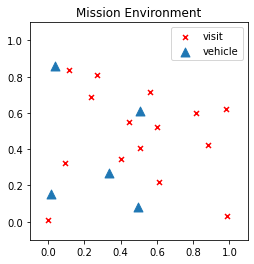

: 

In [81]:
config_name = "simple_hom"
cfg = load_train_config(config_name)
cfg["device"] = "cpu"

seed = random.randint(0, 1000)
env = TA_Static(cfg, seed)
env.reset()

plot(env)